In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import class_weight

In [17]:
# Extract data
X = np.load('Xtrain_Classification_Part2.npy')
y = np.load('Ytrain_Classification_Part2.npy')

X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [18]:
class_names = ['caucasian', 'african', 'asian', 'indian']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [19]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [20]:
# Building CNN Model
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [21]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [22]:
# Calculate weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels), train_labels)

print(class_weights)

classes = [0, 1, 2, 3]
dict_weights = dict(zip(classes, class_weights.T))

print(dict_weights)

[0.41162444 5.37354086 1.36327739 1.53615128]
{0: 0.41162444113263785, 1: 5.373540856031128, 2: 1.3632773938795657, 3: 1.53615127919911}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0. 1. 2. 3.], y=[1. 2. 1. ... 0. 0. 0.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [23]:
# Train model
train_images = np.reshape(train_images, (len(train_images), 50, 50, 1))
test_images = np.reshape(test_images, (len(test_images),50, 50, 1))

history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 10, class_weight=dict_weights)

Epoch 1/10
173/173 [==============================] - 20s 114ms/step - loss: 1.3756 - accuracy: 0.3074 - val_loss: 1.1651 - val_accuracy: 0.5803
Epoch 2/10
173/173 [==============================] - 21s 121ms/step - loss: 1.1007 - accuracy: 0.5074 - val_loss: 0.9376 - val_accuracy: 0.6238
Epoch 3/10
173/173 [==============================] - 17s 100ms/step - loss: 0.9031 - accuracy: 0.6265 - val_loss: 0.8083 - val_accuracy: 0.6922
Epoch 4/10
173/173 [==============================] - 16s 94ms/step - loss: 0.7923 - accuracy: 0.6913 - val_loss: 0.8191 - val_accuracy: 0.6830
Epoch 5/10
173/173 [==============================] - 16s 93ms/step - loss: 0.7051 - accuracy: 0.7252 - val_loss: 0.7277 - val_accuracy: 0.7204
Epoch 6/10
173/173 [==============================] - 16s 93ms/step - loss: 0.6594 - accuracy: 0.7422 - val_loss: 0.6240 - val_accuracy: 0.7687
Epoch 7/10
173/173 [==============================] - 17s 96ms/step - loss: 0.6043 - accuracy: 0.7610 - val_loss: 0.6691 - val_accura

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [25]:
# Accuracy
test_images = test_images.reshape(-1, 50, 50, 1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

58/58 [==============================] - 1s 18ms/step - loss: 0.6465 - accuracy: 0.7644
Test accuracy: 0.7643865346908569


In [26]:
predictions = model.predict(test_images) #test_images
predictions

array([[0.74420196, 0.07281702, 0.1101818 , 0.07279919],
       [0.22005273, 0.03999059, 0.20620738, 0.5337493 ],
       [0.7452036 , 0.02048208, 0.09297113, 0.14134315],
       ...,
       [0.2541738 , 0.03362506, 0.00369432, 0.7085069 ],
       [0.94280094, 0.00141166, 0.00669173, 0.04909571],
       [0.8805977 , 0.01040278, 0.09680171, 0.01219778]], dtype=float32)

In [27]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    y_predicted.append(np.argmax(i))

y_predicted = np.array(y_predicted)
print(y_predicted)

[0 3 0 ... 3 0 0]


BACC = 78.20761659179779


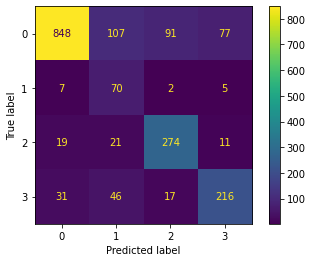

In [28]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

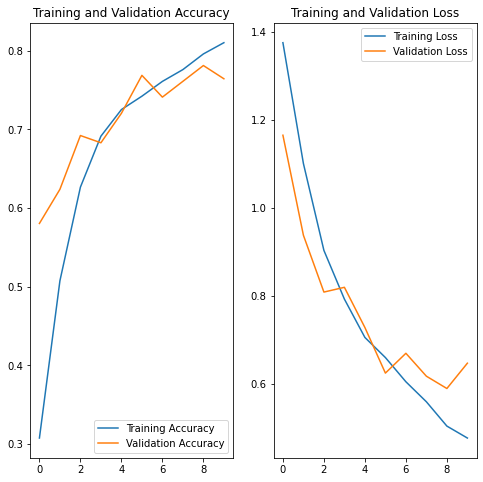

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

